In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd

from tensorflow import keras
from tensorflow.keras import layers
from numpy.random import seed
from tensorflow.random import set_seed

In [1]:
!wget http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s50.zip

--2020-11-02 12:42:48--  http://143.107.183.175:22980/download.php?file=embeddings/glove/glove_s50.zip
Connecting to 143.107.183.175:22980... connected.
HTTP request sent, awaiting response... 200 OK
Length: 181356545 (173M) [application/octet-stream]
Saving to: ‘download.php?file=embeddings%2Fglove%2Fglove_s50.zip’

download.php?file=e 100%[===================>] 172.96M   357KB/s    in 3m 58s  

2020-11-02 12:46:46 (745 KB/s) - ‘download.php?file=embeddings%2Fglove%2Fglove_s50.zip’ saved [181356545/181356545]



In [47]:
!mv download.php?file=embeddings%2Fglove%2Fglove_s50.zip glove_s50.zip
!unzip -q glove_s50.zip

mv: cannot stat 'download.php?file=embeddings%2Fglove%2Fglove_s50.zip': No such file or directory
replace glove_s50.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [2]:
path_to_glove_file = "./glove_s50.txt"

embeddings_index = {}
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs

print("Encontrados %s word vectors." % len(embeddings_index))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  import sys


Encontrados 929594 word vectors.


In [170]:
seed(1)
set_seed(2)

#palavras de estudo
words = ['celular', 'triste', 'arte', 'livro', 'feliz', 'cansado', 'teclado', 'música', 'estudo', 'escritório']

#vetorização
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorizer = TextVectorization(max_tokens=5000, output_sequence_length=10)
text_ds = tf.data.Dataset.from_tensor_slices(words).batch(16)
vectorizer.adapt(text_ds)

voc = vectorizer.get_vocabulary()
word_index = dict(zip(voc, range(len(voc))))

print(word_index)

{'': 0, '[UNK]': 1, 'triste': 2, 'teclado': 3, 'música': 4, 'livro': 5, 'feliz': 6, 'estudo': 7, 'escritório': 8, 'celular': 9, 'cansado': 10, 'arte': 11}


In [171]:
#apresentando palavras que encontram-se no vocabulario

print("Tamanho do índice: ", len(embeddings_index))
print("Tamanho da matriz: ", embedding_matrix.shape[0])

num_tokens = len(voc)
print("Número de tokens: ", num_tokens)
embedding_dim = 50
convertidas = 0
falhas = 0
print()
embedding_matrix = np.zeros((num_tokens, embedding_dim))
print('Palavras Convertidas')
print(embedding_matrix.shape)
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        if (embedding_vector.shape[0] != embedding_dim):
            falhas += 1
            print('Convertida (Não): ',word)
        else:
            embedding_matrix[i] = embedding_vector
            convertidas += 1
            print('Convertida (Sim): ',word)
    else:
        falhas += 1
        print('Convertida (Não): ',word)
print()
print("Total de palavras convertidas: %d | não convertidas: %d)" % (convertidas, falhas))
print()

#indices das classes na matrix
print('Índices das classes na matrix:')
output = vectorizer([["celular triste arte livro feliz cansado teclado música estudo escritório"]])
print(output)

Tamanho do índice:  929594
Tamanho da matriz:  12
Número de tokens:  12

Palavras Convertidas
(12, 50)
Convertida (Não):  
Convertida (Não):  [UNK]
Convertida (Sim):  triste
Convertida (Sim):  teclado
Convertida (Sim):  música
Convertida (Sim):  livro
Convertida (Sim):  feliz
Convertida (Sim):  estudo
Convertida (Sim):  escritório
Convertida (Sim):  celular
Convertida (Sim):  cansado
Convertida (Sim):  arte

Total de palavras convertidas: 10 | não convertidas: 2)

Índices das classes na matrix:
tf.Tensor([[ 9  2 11  5  6 10  3  4  7  8]], shape=(1, 10), dtype=int64)


In [136]:
#função de normalização, caso queira aplicar a normalização nos dados
def normalize(train):
    d_max = np.max(train)
    d_min = np.min(train)		
    return ((train - d_min) / (d_max-d_min))

In [174]:
from sklearn.decomposition import PCA 

n_train = normalize(embedding_matrix) #dado normalizado, caso queira aplicar, mas não é necessário.

pca = PCA(n_components=2 , random_state=1)
#pca_result = pca.fit_transform(n_train) #caso queira normalizar os dados, basta aplicar este PCA
pca_result = pca.fit_transform(embedding_matrix)

#fazendo o de-para de acordo com os índices do embedding_matrix:
dic={' ':pca_result[0], '[UNK]':pca_result[1], 'triste':pca_result[2], 'teclado':pca_result[3], 'música':pca_result[4], 'livro':pca_result[5], 
     'feliz':pca_result[6], 'estudo':pca_result[7], 'escritório':pca_result[8], 'celular':pca_result[9], 'cansado':pca_result[10], 'arte':pca_result[11]} 

#print(pca_result)
data_pca = pd.DataFrame(pca_result, columns=['x','y'])

#atribuindo classes corretras ao dataframe:
data_pca.insert(0,'classes', [' ', '[UNK]', 'triste', 'teclado', 'música', 'livro', 'feliz', 'estudo' ,'escritório', 'celular', 'cansado', 'arte'], True)

#print(pca_result)
data_pca.head(12)

,classes,x,y
0,,0.763272,1.270712
1,[UNK],0.763272,1.270712
2,triste,2.933856,-1.801652
3,teclado,-1.127462,2.879138
4,música,-2.086134,-2.172870
5,livro,-1.642176,-2.092636
6,feliz,2.904129,-1.637500
7,estudo,-2.570981,-0.259961
8,escritório,-0.057668,1.436756
9,celular,-0.534874,3.306433


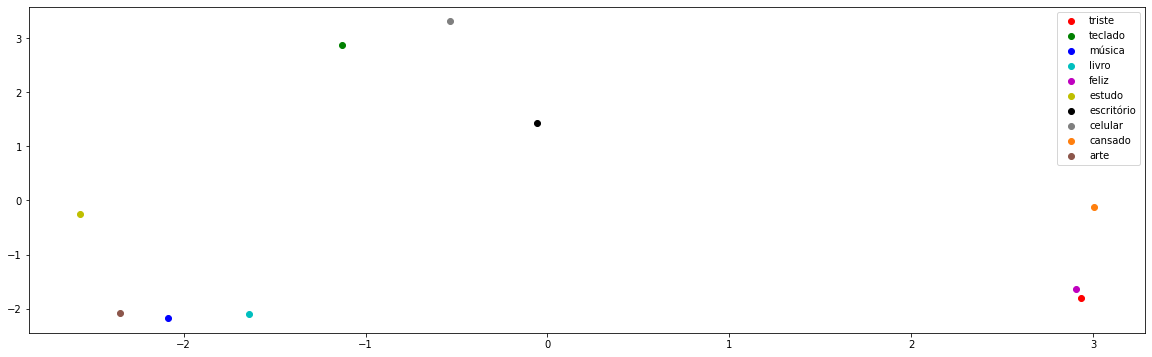

In [175]:
classes = np.unique(data_pca['classes'].iloc[2:]) #pegando os dados a partir do índice 2, pois os 2 primeiros elementos não estão no vocabulário
classes_invertido = classes[::-1] #invertendo a ordem do array
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'tab:gray','tab:orange', 'tab:brown'] #cores para o gráfico
aux=0

plt.figure(figsize=(20,6))

for c in classes_invertido: #por algum motivo, ele leu o classes de trás pra frente. Para corrigir isso, precisei inverter a ordem do array.
  plt.scatter(x=data_pca['x'].iloc[aux+2], y=data_pca['y'].iloc[aux+2], color=colors[aux], label=c) #apresentando os dados a partir do índice 2
  aux=aux+1

plt.legend()
plt.show(True)

In [184]:
from scipy.spatial import distance

print('Distâncias Euclidianas da palavra Celular:')
print()
for i in range(2,12):
  print('%.3f' % distance.euclidean(np.abs(pca_result[9]),np.abs(pca_result[i])),'->',' celular -',data_pca['classes'].iloc[i])

Distâncias Euclidianas da palavra Celular:

2.832 ->  celular - triste
0.731 ->  celular - teclado
1.921 ->  celular - música
1.643 ->  celular - livro
2.898 ->  celular - feliz
3.664 ->  celular - estudo
1.930 ->  celular - escritório
0.000 ->  celular - celular
4.037 ->  celular - cansado
2.187 ->  celular - arte


In [164]:
print('Distâncias Euclidianas da palavra Triste:')
print()
for i in range(2,12):
  print('%.3f' % distance.euclidean(np.abs(pca_result[2]),np.abs(pca_result[i])),'->',' triste -',data_pca['classes'].iloc[i])

Distâncias Euclidianas da palavra Triste:

0.000 ->  triste - triste
2.103 ->  triste - teclado
0.925 ->  triste - música
1.324 ->  triste - livro
0.167 ->  triste - feliz
1.584 ->  triste - estudo
2.899 ->  triste - escritório
2.832 ->  triste - celular
1.690 ->  triste - cansado
0.649 ->  triste - arte


In [165]:
print('Distâncias Euclidianas da palavra Arte:')
print()
for i in range(2,12):
  print('%.3f' % distance.euclidean(np.abs(pca_result[11]),np.abs(pca_result[i])),'->',' arte -',data_pca['classes'].iloc[i])

Distâncias Euclidianas da palavra Arte:

0.649 ->  arte - triste
1.457 ->  arte - teclado
0.278 ->  arte - música
0.708 ->  arte - livro
0.713 ->  arte - feliz
1.839 ->  arte - estudo
2.382 ->  arte - escritório
2.187 ->  arte - celular
2.078 ->  arte - cansado
0.000 ->  arte - arte


In [166]:
print('Respostas:')
print('0.731 ->  celular - teclado')
print('0.167 ->  triste - feliz')
print('0.278 ->  arte - música')

Respostas:
0.731 ->  celular - teclado
0.167 ->  triste - feliz
0.278 ->  arte - música
